In [1]:
# fmt: off
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%load_ext jupyter_black
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
from njl_corf import ureg
plt.style.use("mls_scf")
def vdir(obj):
    return [x for x in dir(obj) if not x.startswith('__')]

In [2]:
import pint

In [3]:
%autoreload 2
from njl_corf import pyoscar

In [4]:
oscar_data = pyoscar.read()

In [5]:
bands = oscar_data[35.0 * ureg.GHz : 36.0 * ureg.GHz]

/Users/livesey/miniforge3/envs/njl-base-3.12-02jan25/lib/python3.12/site-packages/matplotlib/cbook.py:1355: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


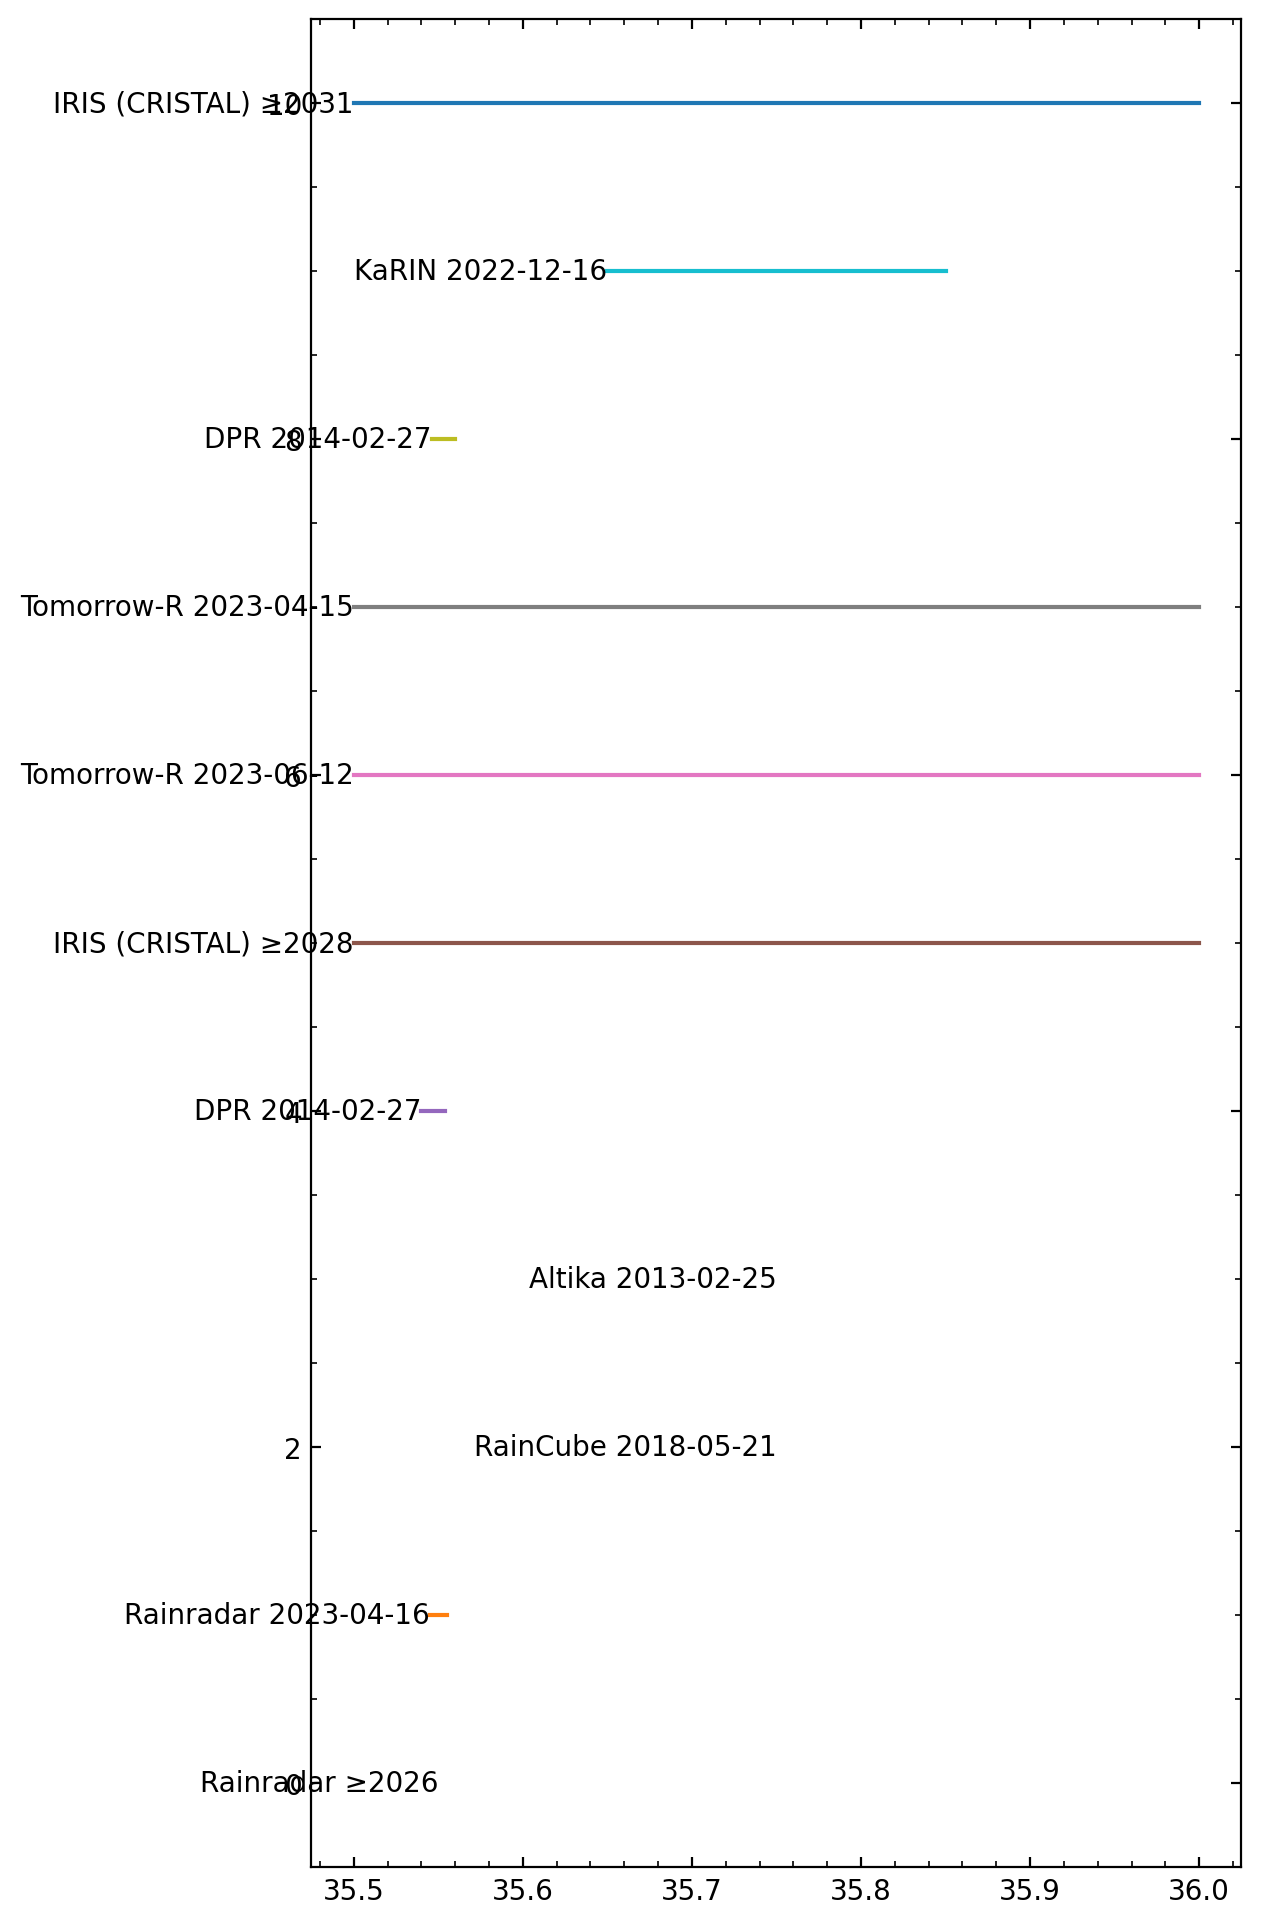

Range is 35.5 gigahertz to 36.0 gigahertz


In [6]:
fig, ax = plt.subplots(figsize=[6, 12])
for i, band in enumerate(bands):
    data = band.data
    ax.plot(pint.Quantity.from_list([data.bounds.start, data.bounds.stop]), [i] * 2)
    ax.text(
        data.bounds.start.magnitude,
        i,
        f"{data.service} {data.launch}",
        ha="right",
        va="center",
    )
plt.show()
print(
    f"Range is {min(b.data.bounds.start for b in bands)} "
    f"to {max(b.data.bounds.stop for b in bands)}"
)

In [7]:
vdir(list(bands)[0].data)

['_determine_status',
 '_parse_date',
 'bandwidth',
 'bounds',
 'comment',
 'eol',
 'launch',
 'nominal_frequency',
 'oscar_id',
 'polarization',
 'satellite',
 'sensing_mode',
 'service',
 'space_agency',
 'status']